In [12]:
from sklearn.metrics import normalized_mutual_info_score as nmi
import pickle
import os
import seaborn as sns; sns.set()
import pandas as pd
from matplotlib import pyplot as plt

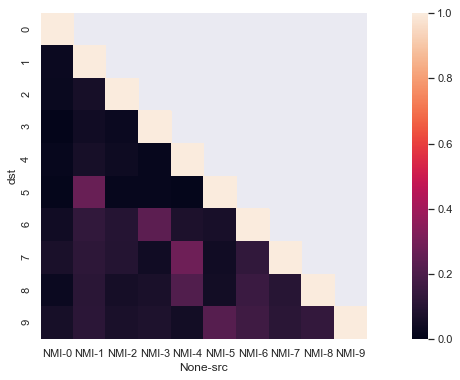

In [24]:
BASEDIR='output/brfl'

gene_set = set()

for file in os.listdir(BASEDIR):
    if 'selected_genes' in file:
        genes = pd.read_csv(os.path.join(BASEDIR, file), sep=',')['gene'].tolist()
        gene_set = gene_set.union(set(genes))
            
gene_set = list(gene_set)

flags = {}

i = 0

for file in os.listdir(BASEDIR):
    if 'selected_genes' in file:
        current_gene_set = pd.read_csv(os.path.join(BASEDIR, file), sep=',')['gene'].tolist()
        flags[i] = [int(g in current_gene_set) for g in gene_set]
        i += 1

result = {'src': [], 'dst': [], 'NMI': []}
            
for src in range(10):
    for dst in range(src, 10):
        result['src'].append(src)
        result['dst'].append(dst)
        result['NMI'].append(nmi(flags[src], flags[dst], average_method='arithmetic'))
        
nmis = pd.DataFrame(result).set_index(['src', 'dst']).unstack(level=0)

plt.figure(figsize=(16, 6))
sns.heatmap(nmis, vmin=0.0, vmax=max(result['NMI']), square=True);

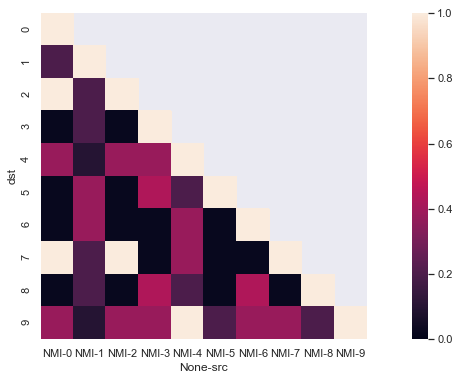

In [25]:
BASEDIR='output/brfl'

gene_set = set()

for file in os.listdir(BASEDIR):
    if 'selected_feats' in file:
        genes = pd.read_csv(os.path.join(BASEDIR, file), sep=',')['gene'].tolist()
        gene_set = gene_set.union(set(genes))
            
gene_set = list(gene_set)

flags = {}

i = 0

for file in os.listdir(BASEDIR):
    if 'selected_feats' in file:
        current_gene_set = pd.read_csv(os.path.join(BASEDIR, file), sep=',')['gene'].tolist()
        flags[i] = [int(g in current_gene_set) for g in gene_set]
        i += 1

result = {'src': [], 'dst': [], 'NMI': []}
            
for src in range(10):
    for dst in range(src, 10):
        result['src'].append(src)
        result['dst'].append(dst)
        result['NMI'].append(nmi(flags[src], flags[dst], average_method='arithmetic'))
        
nmis = pd.DataFrame(result).set_index(['src', 'dst']).unstack(level=0)

plt.figure(figsize=(16, 6))

sns.heatmap(nmis, vmin=0.0, vmax=max(result['NMI']), square=True);